# Сборный проект 1

# Описание проекта

**Данные:** 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные за период с 1980 по 2016 год. За 2016 год данные неполные.

**Задача:** 
- Выявить закономерности, определяющие успешность игры. 
- Определить потенциально популярный продукт.

## Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

Визуально оценим данные. Выведем первые 10 строк таблицы.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем информацию о таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо провести следующие действия:
- привести наименование столбцов к рабочему формату,
- провести оценку количества пропусков и возможности их замены или удаления,
- изменить тип данных в столбцах `Year_of_Release`, `User_Score`,
- проверить на наличие дубликатов.  

## Предобработка данных

### Наименования столбцов

Приведем наименование всех столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

### Обработка пропусков

Оценим количество пропусков.

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах `name` и `genre` по 2 пропуска. Посмотрим их визуально.

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в обоих столбцах в одних и тех же строках. Восстановить наименование и жанр по другим данным не представляется возможным. Удалим строки.

Пропуски могли появиться по причине ошибки при сборе данных, например забыли указать, или названия не было совсем в далеком 1993.

Проверим пропуски в столбце `year_of_release`

In [8]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
data[data['year_of_release'].isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Пропусков не очень много. Восстановить пропуски по другим данным нет возможности. Проверим какое количество данных мы потеряем при удалении этих сток, если менее 5% - удалим.

Пропуски могли появиться при сборе данных, по наименованиям некоторых игр видно, что год указан как часть названия.

In [10]:
(data['year_of_release'].isna().sum() + data['name'].isna().sum()) / data['platform'].count() * 100

1.6212982351181575

При удалении строк с пропусками в столбцах `name`, `genre`, `year_of_release` потеряем менее 2% данных. 

In [11]:
data = data.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index(drop = True)

P.S. в голове еще был вариант заменить все пропуски заглушками, но потом я подумала, что далее при анализе эти столбцы нам понадобятся и если каждый раз учитывать их наличие можно запутаться или забыть это учесть, тогда мжно допустить ошибку и я приняла решение пожертвовать этими даными.

В столбцах `critic_score` и `user_score` много пропусков, однако их заполнение медианой или средним может привести к искажению данных и анализа в целом. Пропуски могли возникнуть из-за отсутствия оценок, например игра новая и ее еще не успели оценить, или охват игры был небольшой, поэтому оценок нет.

In [15]:
data['critic_score'].apply (['min', 'max'])

min    13.0
max    98.0
Name: critic_score, dtype: float64

Максимальное значение `critic_score` - 98, значит пропуски можно заполнить значением 111

In [16]:
data['critic_score'] = data['critic_score'].fillna(111)

Столбец `user_score` имеет тип данных object, при ожидаемом float. Проверим уникальные значения в столбце.

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Данные `tbd` означают, что оценка пользователя не определена. Приравняем это значение к пропуску.  

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Так как максимальная пользовательская оценка равна 10, и для удобства запоминания, заполним пропуски значением 111.

In [19]:
# проверим как увеличилось количество пропусков
data['user_score'].isna().sum()

8981

In [20]:
data['user_score'] = data['user_score'].fillna(111)

Столбец `rating` так же не может быть заполнен на основании других данных, пропуски могли образоваться из-за того, что во время выхода игры рейтингов еще не было или рейтинг не был присвоен. Заменим пропуски на значение unknown

In [21]:
data['rating'] = data['rating'].fillna('unknown')

Посмотрим какие значения содержит колонка `rating`

In [22]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг `E` и `K-A` это один и тот же тип рейтинга "для всех", но в разные годы. Приведем их к одному значению для удобства в дальнейшем анализе.

In [23]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [24]:
# проверим наличие пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Тип данных

Заменим тип данных в столбце `year_of_release` на `int`

In [25]:
data['year_of_release'] = data['year_of_release'].astype('int')

Заменим тип данных в столбце `user_score` на `float`

In [26]:
data['user_score'] = data['user_score'].astype('float')

### Суммарные продажи

Добавим столбец с суммарными продажами.

In [27]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

Проверим корректность добавления столбца

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,111.0,111.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,111.0,111.0,unknown,31.38


### Проверка на дубликаты

Проверим наличие дубликатов

In [29]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

Проверим наличие дубликатов по части значений

In [30]:
data.duplicated(subset = ['name', 'platform', 'year_of_release', 'genre']).sum()

1

Обнаружен неявный дубликат. Посмотрим, что это за строки

In [31]:
data[data.duplicated(subset = ['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [32]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


В строке 15969 представлены данные о продажах только в Европе и это значение сильно отличается от суммы продаж в Европе в строке 600. Природа данных неясна, учтены ли эти данные в стороке 600 или нет неизвестно. 

Полагаю целесообразным стороку удалить. 

Причиной появления мог стать способ сбора данных, возможно они получены из разных источников. 

In [33]:
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release', 'genre'], keep = 'first').reset_index(drop = True)

Проверим результат предобработки данных

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

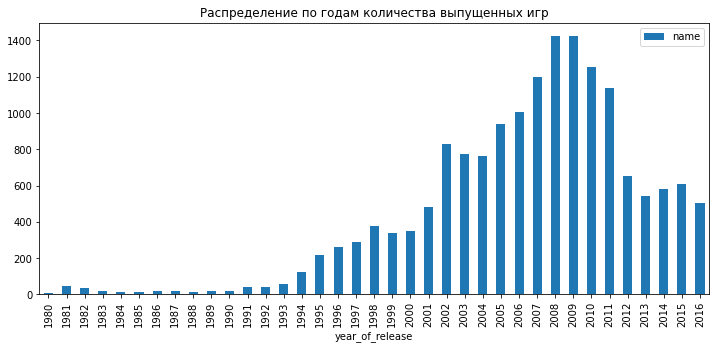

In [35]:
(data
 .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
 .plot(kind = 'bar', figsize = (12, 5), title = 'Распределение по годам количества выпущенных игр'));

На графике видно:
- количество выпускаемых игр начинает постепенно увеличиваться начиная с 1993 года
- в 2002 году происходит резкий скачок
- наибольшее количество выпускаемых игр в период с 2007 по 2011 года
- с 2012 года резкий спад и далее относительная стабильность.

Определим платформы с наибольшими суммарными продажами.

In [36]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head(15)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
Name: sum_sales, dtype: float64

По данным видно, что первые 6 платформ - `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`, - сильно превышают по продажам остальные. 

Посмотрим изменение продаж по годам на каждой из этих платформ.

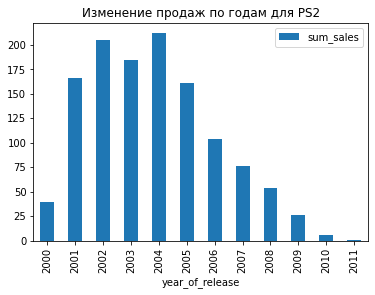

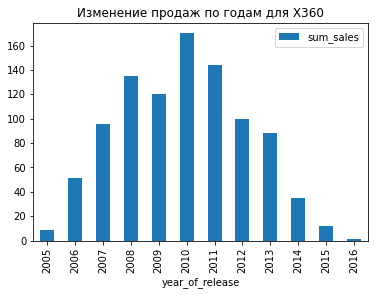

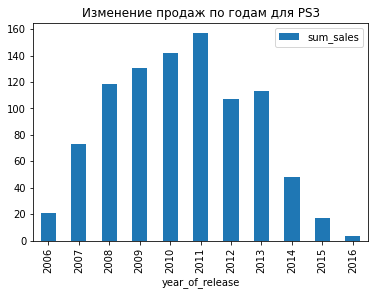

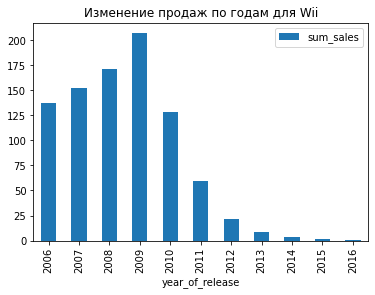

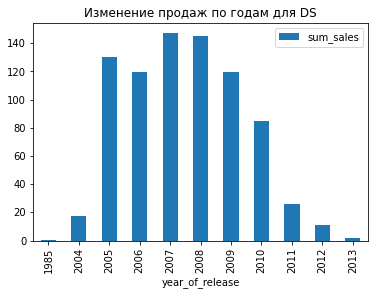

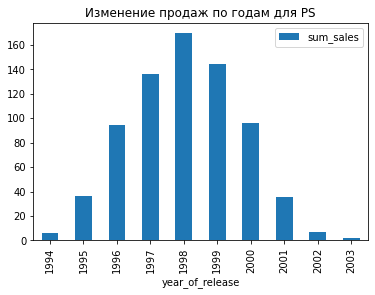

In [37]:
for i in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    (data[data['platform'] == i]
     .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
     .plot(kind = 'bar', title = f'Изменение продаж по годам для {i}'));

Посмотрим в каком году произошел первый и последний релиз игр для каждой платформы.

In [38]:
data.groupby('platform').agg({'year_of_release':['min','max']}).sort_values(by = ('year_of_release','min'))

year_of_release      
                     min   max
platform                      
2600                1980  1989
NES                 1983  1994
DS                  1985  2013
PC                  1985  2016
GB                  1988  2001
SNES                1990  1999
GEN                 1990  1994
GG                  1992  1992
SCD                 1993  1994
NG                  1993  1996
SAT                 1994  1999
PS                  1994  2003
3DO                 1994  1995
TG16                1995  1995
PCFX                1996  1996
N64                 1996  2002
DC                  1998  2008
WS                  1999  2001
GBA                 2000  2007
XB                  2000  2008
PS2                 2000  2011
GC                  2001  2007
PSP                 2004  2015
X360                2005  2016
PS3                 2006  2016
Wii                 2006  2016
3DS                 2011  2016
PSV                 2011  2016
WiiU                2012  2016
PS4                 2013  2016
XOne                2013  2016

По графикам можно оценить, что средняя продолжительность активных продаж на изученных платформах составляет 8 лет.

По данным таблицы видно, что в среднем новые платформы появлялись каждый год, однако после 2006 года был перерыв в 5 лет и после 2013 новых платформ тоже не было.

На момент 2016 года были релизы игр на 9 платформах - PS, X360, PS3, Wii, 3DS, PSV, WiiU, PS4, XOne.

На платформе PSP последний релиз состоялся в 2015 году.

Из этих платформ наибольшее число продаж было у X360. Посмотрим отдельно по ней изменения по годам количества выпускаемых игр и общих продаж.

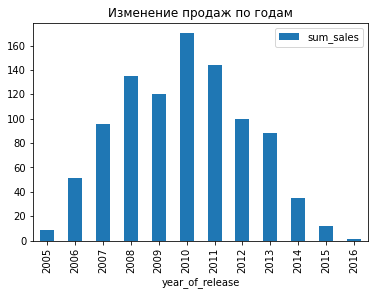

In [39]:
(data[data['platform'] == 'X360']
 .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
 .plot(kind = 'bar', title = 'Изменение продаж по годам'));

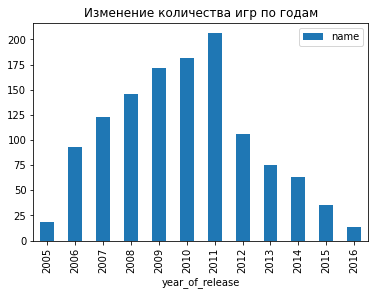

In [40]:
(data[data['platform'] == 'X360']
 .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
 .plot(kind = 'bar', title = 'Изменение количества игр по годам'));

Количество выпускаемых игр резко увеличилось в 2006 года и затем плавно увеличивалось до 2011 года, начиная с 2012 года резкий спад и далее плавное уменьшение. Странно, что в 2011 года было выпущено наибольшее число игр, но при этом продажи начали уменьшаться.

Определим **актуальный период** для исследования. 

График 'Распределение по годам количества выпущенных игр' показывает, что наибольшее число игр выходило в период с 2007 по 2011 года, однако данный период не реливантет для построения прогноза на 2017 год из-за большого временного промежутка между периодами оценки и прогнозирования.

С учетом того, что с 2012 года прослеживается устойвый спад количества выпускаемых игр, за 2016 год в наличии неполные данные, а так же по предварительной оценке средняя продолжительность активной работы платформы 8 лет - за **актуальный период** примем период с 2012 по 2015 года.

Отфильтрованные данные с учетом актуального периода запишем в новую таблицу `actual_data` и будем использовать ее далее для анализа.

P.S. думаю, что из-за неполноты сведений по 2016 году, его необходимо рассматривать отдельно, т.к. нам неизвестно за какой именно период 2016 года данные отсутствуют, рассмотрение 2016 года совместно с другими данными за полный год может привести к искажению суждений.

In [41]:
actual_data = data.query('2012 <= year_of_release <= 2015')

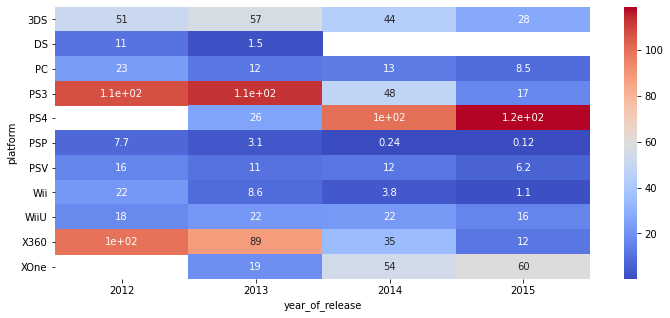

In [42]:
plt.figure(figsize = (12, 5))
sns.heatmap(actual_data
            .pivot_table(index = 'platform', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum'), 
            cmap = 'coolwarm', annot = True);

Рассмотрим каждую платформу на графике:
* 3DS - продажи хорошие, в среднем диапазоне, заметно падение, но в 2015 году занимает третье место по суммарным продажам;
* DS - последний релиз в 2013 году, спад продаж, скорее всего изза выхода на рынок 3DS;
* PC - невысокие сумарные продажи, достаточно стабильные, без резких скачков, наблюдается плавное снижение продаж;
* PS3 - резкое падение продаж после 2013 года, видимо связано с выходом на рынок PS4;
* PS4 - первый релиз в 2013 году, показывает хороший рост продаж, видимо из-за своей новизны;
* PSP - на 2015 год - самый низкий уровень продаж среди всех платформ;
* PSV - в 2015 году продажи уменьшились вдвое относительно предшествующего года;
* Wii - с 2013 года в 2.5 раза снизились сумарные продажи и далее продолжается резкое падение; 
* WiiU - невысокие результаты продаж, но достаточно стабильные;
* X360 - резкое снижение с 2013 года и далее, может быть связано с выходом на рынок XOne;
* XOne - первый релиз в 2013 году, за 3 года показывает рост, стабильность, но не самые высокие продажи.  

Определим **потенциально прибыльные платформы**:
- PS4, XOne - новички на рынке, показывают хороший рост продаж, можно ожидать еще несколько лет хорошей стаильной прибыли;
- 3DS, WiiU - стабильность признак мастерства, показывают невысокие продажи, однако достаточно стабильны во времени без сильных падений;
- PS3, X360 - уходящие герои, в связи с появление на рынке новичков продажи значительно упали, однако все равно еще на конкурентном уровне, но сильно на них надеяться не стоит.

(0.0, 3.0)

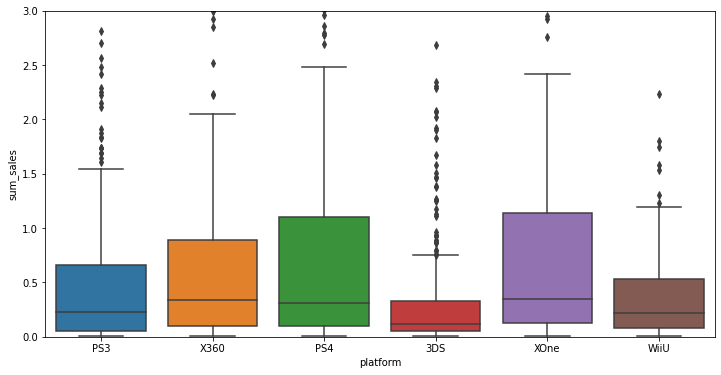

In [43]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = actual_data.query('platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]'), y = 'sum_sales', x = 'platform')
plt.ylim(0, 3)

In [44]:
actual_data.query('platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]').groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,350.0,0.512771,1.424582,0.01,0.0500,0.115,0.3300,14.60
PS3,454.0,0.628150,1.516653,0.01,0.0525,0.230,0.6600,21.05
PS4,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63
WiiU,133.0,0.583383,1.105384,0.01,0.0800,0.220,0.5300,7.09
X360,279.0,0.842366,1.744755,0.01,0.1000,0.340,0.8900,16.27
XOne,160.0,0.832313,1.182243,0.01,0.1300,0.350,1.1375,7.39


Наилучшие показатели продаж у XOne и PS4, у данных платформ наибольшие значения медианы и квантилей.

У X360 хорошие результаты, медиана даже выше, чем у PS4 и достаточно много продаж.

PS3 и WiiU имеют примерно равные показатели, однако у PS3 гораздо больше продаж.

В отстающих 3DS, самые низкие показатели квантилей, при среднем количестве продаж, но при этом максимальное значение достаточно высокое (возможно есть какая то игра, которая выстрелила по продажам).

Определим более популярную платформу для анализа. 

PS4 больше продаж, чем у XOne, возможно у нее будет и больше отзывов. Проверим количество отзывов у каждой платформы.

In [45]:
# при предобработке пропуски в столбцах с оценками были заполнены значением 111, отфильтруем данные по оценкам для рассчетов
score_data = actual_data.query('critic_score != 111 and user_score != 111')

In [46]:
# Проверяем количество отзывов критиков
if len(score_data[score_data['platform'] == 'PS4']['critic_score']) > len(score_data[score_data['platform'] == 'XOne']['critic_score']):
    print('Для анализа PS4 подходит лучше')
elif len(score_data[score_data['platform'] == 'PS4']['critic_score']) < len(score_data[score_data['platform'] == 'XOne']['critic_score']):
    print('Для анализа XOne подходит лучше')
else:
    print('Ой. Не получилось')

Для анализа PS4 подходит лучше


In [47]:
# Проверяем количество отзывов пользователей
if len(score_data[score_data['platform'] == 'PS4']['user_score']) > len(score_data[score_data['platform'] == 'XOne']['user_score']):
    print('Для анализа PS4 подходит лучше')
elif len(score_data[score_data['platform'] == 'PS4']['user_score']) < len(score_data[score_data['platform'] == 'XOne']['user_score']):
    print('Для анализа XOne подходит лучше')
else:
    print('Ой. Не получилось')

Для анализа PS4 подходит лучше


In [48]:
score_data.query('platform == "PS4"')[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.612451,0.430777
user_score,0.612451,1.000000,0.018139
sum_sales,0.430777,0.018139,1.000000


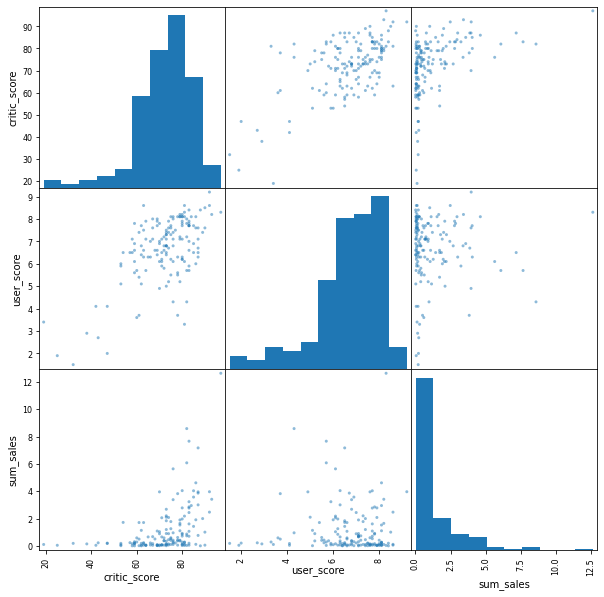

In [49]:
pd.plotting.scatter_matrix(score_data.query('platform == "PS4"')[['critic_score', 'user_score', 'sum_sales']], figsize = (10, 10));

* Наблюдается средняя положительная корреляция между оценками критиков и оценками пользователей. Чем выше оценка критиков, тем выше оценка пользователей.

* Наблюдается небольшая положительная корреляция между оценками критиков и суммарными продажами. Чем выше оценка, ем больше суммарные продажи.

* Коэффициент корреляции между оценками пользователей и суммарными продажами близок к нулю. Зависимость не прослеживается. 

* На диаграммах рассеяния видно, что в целом игры с низкими оценками покупаются мало.



Проверим выводы на других платформах - "XOne", "PS3", "X360", "WiiU", "3DS"

In [50]:
# для платформы XOne
score_data.query('platform == "XOne"')[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.499502,0.451360
user_score,0.499502,1.000000,-0.051243
sum_sales,0.451360,-0.051243,1.000000


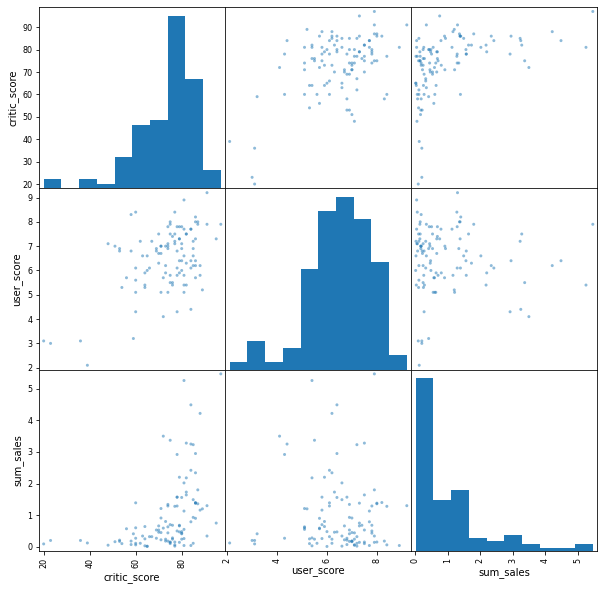

In [51]:
pd.plotting.scatter_matrix(score_data.query('platform == "XOne"')[['critic_score', 'user_score', 'sum_sales']], figsize = (10, 10));

In [52]:
# для платформы PS3
score_data.query('platform == "PS3"')[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.544510,0.333726
user_score,0.544510,1.000000,0.001425
sum_sales,0.333726,0.001425,1.000000


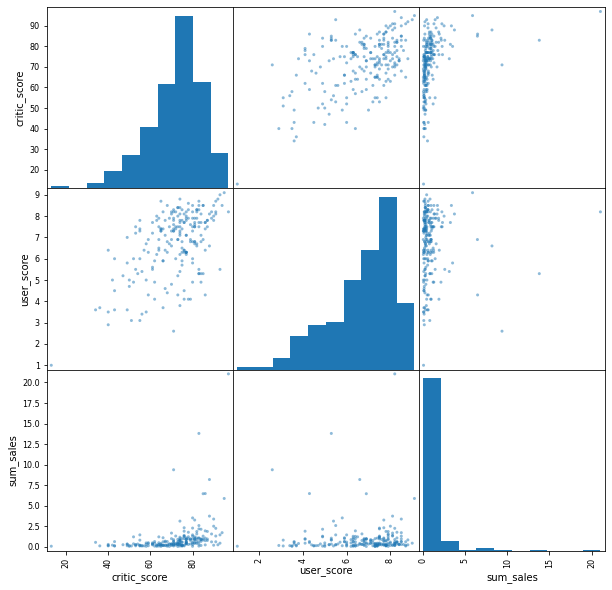

In [53]:
pd.plotting.scatter_matrix(score_data.query('platform == "PS3"')[['critic_score', 'user_score', 'sum_sales']], figsize = (10, 10));

In [54]:
# для платформы X360
score_data.query('platform == "X360"')[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,-0.002014
sum_sales,0.360573,-0.002014,1.000000


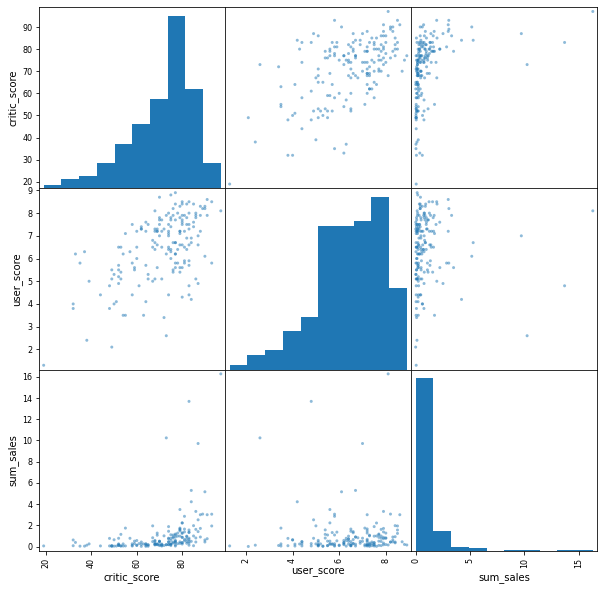

In [55]:
pd.plotting.scatter_matrix(score_data.query('platform == "X360"')[['critic_score', 'user_score', 'sum_sales']], figsize = (10, 10));

In [56]:
# для платформы WiiU
score_data.query('platform == "WiiU"')[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.760811,0.354691
user_score,0.760811,1.000000,0.405087
sum_sales,0.354691,0.405087,1.000000


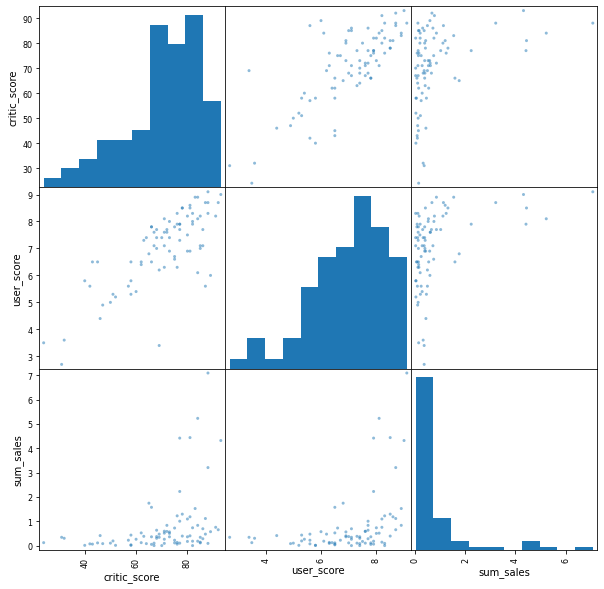

In [57]:
pd.plotting.scatter_matrix(score_data.query('platform == "WiiU"')[['critic_score', 'user_score', 'sum_sales']], figsize = (10, 10));

In [58]:
# для платформы 3DS
score_data.query('platform == "3DS"')[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.723831,0.321472
user_score,0.723831,1.000000,0.208855
sum_sales,0.321472,0.208855,1.000000


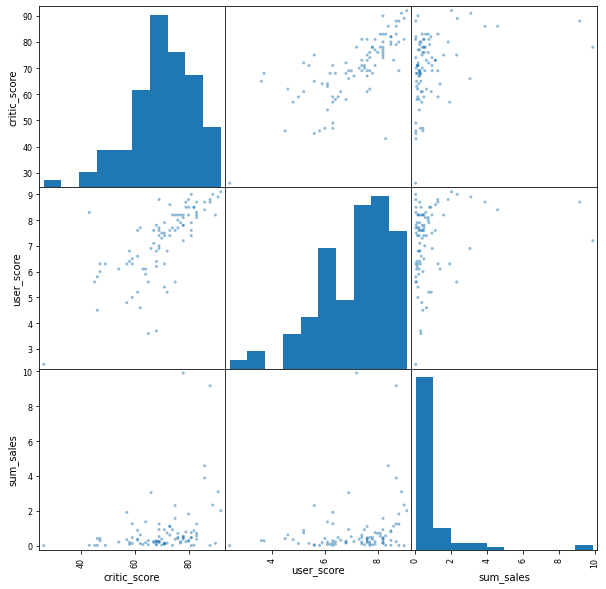

In [59]:
pd.plotting.scatter_matrix(score_data.query('platform == "3DS"')[['critic_score', 'user_score', 'sum_sales']], figsize = (10, 10));

В целом для остальных платформ выводы подтверждаются.

Интересно, что для платформ одного производителя прослеживаются свои особенности. 

Для платформ Xbox корреляция между оценками пользователей и суммарными продажами как и у PlayStation близка к нулю, но имеет незначительное отклонение в отрицательную сторону.

А у платформ Nintendo прослеживается небольшая корреляция между оценками пользователей и суммарными продажами сравнимая по показателям с корреляцией между оценками критиков и продажами.

Рассмотрим распределение игр по жанрам.

In [60]:
(actual_data
 .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = ['median', 'count', 'mean', 'sum'])
 .sort_values(by = ('median', 'sum_sales'), ascending = False)
 .style.format("{:,.2f}"))

,median,count,mean,sum
,sum_sales,sum_sales,sum_sales,sum_sales
genre,,,,
Shooter,0.53,188.00,1.42,266.51
Sports,0.31,219.00,0.72,157.57
Platform,0.29,70.00,0.83,57.77
Racing,0.23,91.00,0.56,50.71
Misc,0.18,160.00,0.52,82.44
Fighting,0.16,93.00,0.43,40.02
Role-Playing,0.15,316.00,0.55,174.62
Simulation,0.15,62.00,0.54,33.23


За основной параметр оценки примем медиану. Медиана наимения подвержена влиянию уникальных значений и показывает, что по 50 % игр в заданном жанре совершено количество продаж равное или меньше значения медианы. 

Исходя из данных сводной таблицы можно сделать следующие выводы:

* Жанры с высокими продажами:
  - 1 - Shooter. Имеет самое высокое значение медианы среди всех жанров, а так же самое высокое среднее количество продаж.
  - 2 - Sports. Высокое значение медианы и среднего, большое количество игр в этом жанре, что в сумме дает хорошие суммарные продажи.
  - 3 - Platform. Высокое значение медианы и среднего, среднее количество продаж выше, чем в жанре Sports, т.к. количество игр невысокое.
  
* Жанры с низкими продажами:
  - 1 - Adventure. Самое низкое значение медианы и среднего, даже при большом количестве игр имеет низкие суммарные продажи.
  - 2 - Puzzle. Низкое значение медианы и среднего, самое низкое количество игр среди всех жанров и самые низкие суммарные продажи.
  - 3 - Strategy. Низкое значение медианы и среднего, небольшое количество игр и низкие суммарные продажи.
  
Интересно выглядят данные по жанру Action - при невысокой медиане имеют наибольшие сумарные продажи среди всер жанров, это можно объяснить очень высоким общим количетсвом игр. В целом жанр кажется популярным из-за большого количетсва игр и высоких суммарных продаж, однако невысокое медианное значение говорит о том, что большинство из этих игр продаются не так часто. При этом видно большую разницу между медианой и средним, значит на среднее влияют высокие значения. Возможно в данном жанре есть несколько любимчиков пользователей, которые покупают чаще других, но при этом из-за большого выбора остальные игры остаются без внимания.



ТОП-5 жанров с наибольшими суммарными продажами:

In [61]:
(actual_data
 .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
 .sort_values(by = 'sum_sales', ascending = False)
 .head())

,sum_sales
genre,
Action,411.01
Shooter,266.51
Role-Playing,174.62
Sports,157.57
Misc,82.44


Рассмотрим отдельно жанр Action

array([[<AxesSubplot:title={'center':'sum_sales'}>]], dtype=object)

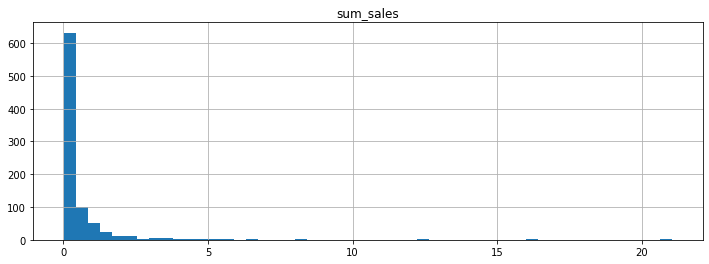

In [62]:
actual_data.query('genre == "Action"').hist('sum_sales', bins = 50, figsize = (12, 4))


На гистограмме видно, что есть отдельные точечные значения с высокими суммарными продажами, они оказывают сильное влияние на общее число продаж, возможно это самые любимые пользователями представители жанра

In [63]:
# эти игры знает пожалуй каждый
actual_data.query('genre == "Action" and sum_sales >= 8')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17


Посмотрим распределение суммарных продаж по годам в зависимости от жанра.

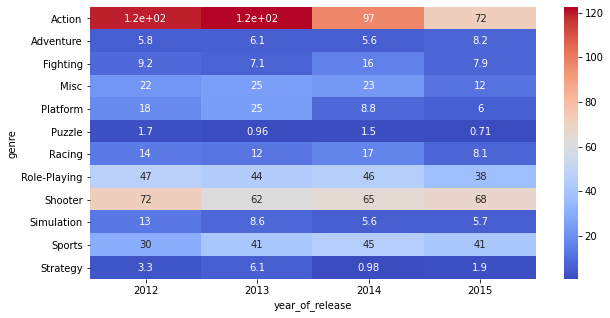

In [64]:
plt.figure(figsize = (10, 5))
sns.heatmap(actual_data
            .pivot_table(index = 'genre', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum'), 
            cmap = 'coolwarm', annot = True);

Наиболее популярными и прибыльными можно назвать жанры - Shooter, Sports, Role-Playng. Они имеют наиболее стабильные высокие показатели среди всех жанров.

Жанр Action имеет самое высокое количество суммарных продаж, однако в 2014 и 2015 продажи начали падать.

## Портрет пользователя

### Северная Америка

Проверим долю продаж для каждой платформы относительно суммарных продаж по всему региону. 

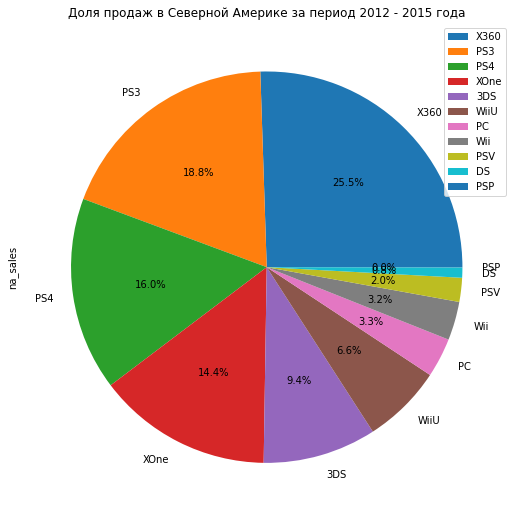

In [65]:
(actual_data
 .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
 .plot(kind = 'pie', y = 'na_sales', figsize = (9, 9), autopct = '%1.1f%%')
);
plt.title('Доля продаж в Северной Америке за период 2012 - 2015 года');

С учетом того, что платформы PS4 и XOne новые и пришли на смену PS3 и X360, проверим как будет выглядеть распределение за более короткий период - 2014 и 2015 годы.

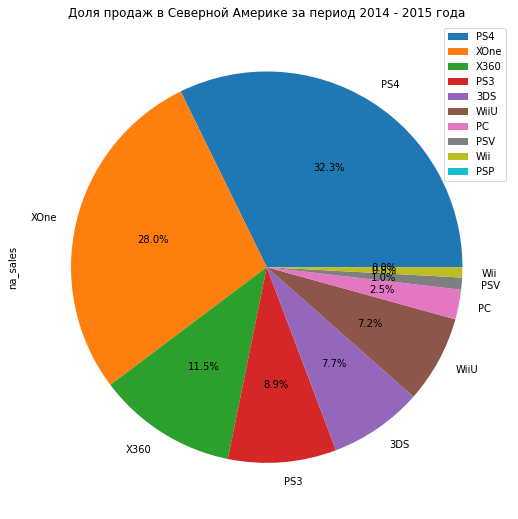

In [66]:
(actual_data
 .query('year_of_release >= 2014')
 .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
 .plot(kind = 'pie', y = 'na_sales', figsize = (9, 9), autopct = '%1.1f%%')
);
plt.title('Доля продаж в Северной Америке за период 2014 - 2015 года');

**ТОП-5 прибыльных платформ:**
- PS4
- XOne
- Х360
- PS3
- 3DS

При рассмотрении периода 2012-2015 года суммарно доля продаж по приставкам Xbox (XOne и  X360) превышала долю продаж по приставкам PlayStation (PS3 и PS4). Однако если смотреть период только 2014-2015 года, то видно, что суммарная доля продаж по приставкам PlayStation немного превысила долю продаж Xbox. Возможно пользователям в Свереной Америке не понравилась обновленная XOne.

Также по распределению видно, что пользователи предпочитают играть дома, а не на ходу, так как преобладают продажи стационарных приставок.

Популярность всего жанра корректнее оценивать с точки зрения, полулярности большинства игр одного жанра, если из всего жанра популярна у пользователей только 1-2, а все остальные имеют низкое число продаж, это говорит о том, что именно эти 1-2 игры хорошие и интересные, но не оценивает отношение пользователей ко всему жанру в целом.

Поэтому считаю целесообразным проводить оценку исходя из данных медианы, а не суммарных продаж.

In [67]:
(actual_data
 .pivot_table(index = 'genre', values = 'na_sales', aggfunc = ['median', 'count', 'mean', 'sum'])
 .sort_values(by = ('median', 'na_sales'), ascending = False)
 .style.format("{:,.2f}")) 

,median,count,mean,sum
,na_sales,na_sales,na_sales,na_sales
genre,,,,
Shooter,0.22,188.00,0.68,128.53
Platform,0.12,70.00,0.34,24.09
Sports,0.10,219.00,0.34,73.99
Racing,0.06,91.00,0.18,16.49
Fighting,0.05,93.00,0.19,17.95
Action,0.03,853.00,0.20,168.55
Role-Playing,0.02,316.00,0.18,58.11
Simulation,0.02,62.00,0.13,7.81


**ТОП-5 игровых жанров:**
- Shooter
- Platform
- Sports
- Racing
- Fighting

Shooter наиболее популярный жанр среди пользователей в Северной Америке.

### Европа

Проверим долю продаж для каждой платформы относительно суммарных продаж по всему региону. 

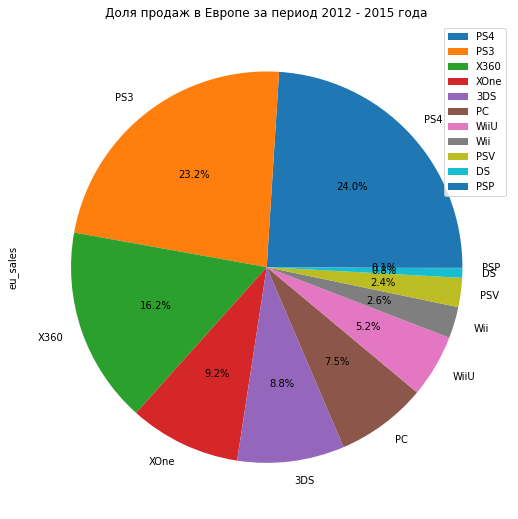

In [68]:
(actual_data
 .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False)
 .plot(kind = 'pie', y = 'eu_sales', figsize = (9, 9), autopct = '%1.1f%%')
);
plt.title('Доля продаж в Европе за период 2012 - 2015 года');

Проверим как изменилась ситуация в последние годы 2014 и 2015

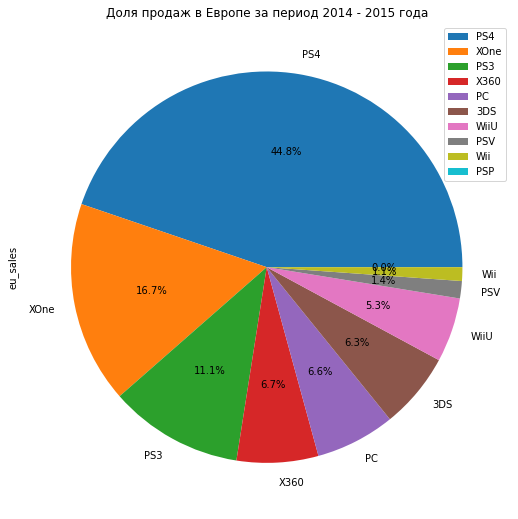

In [69]:
(actual_data
 .query('year_of_release >= 2014')
 .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False)
 .plot(kind = 'pie', y = 'eu_sales', figsize = (9, 9), autopct = '%1.1f%%')
);
plt.title('Доля продаж в Европе за период 2014 - 2015 года');

**ТОП-5 прибыльных платформ:**
- PS4
- XOne
- PS3
- Х360
- PC

При рассмотрении 2х периодов 4 года 2012-2015 и 2 года 2014-2015 ситуация карднально не поменялась. 

Суммарная доля продаж по приставкам PlayStation (PS3 и PS4) преимущественно превышает суммарную долю продаж приставок Xbox (X360 и XOne). 

Также по распределению видно, что пользователи предпочитают играть дома, так как сильно преобладают продажи стационарных приставок.

In [70]:
(actual_data
 .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = ['median', 'count', 'mean', 'sum'])
 .sort_values(by = ('median', 'eu_sales'), ascending = False)
 .style.format("{:,.2f}")) 

,median,count,mean,sum
,eu_sales,eu_sales,eu_sales,eu_sales
genre,,,,
Shooter,0.21,188.00,0.52,97.57
Platform,0.12,70.00,0.29,20.02
Racing,0.12,91.00,0.28,25.52
Sports,0.06,219.00,0.26,57.07
Simulation,0.04,62.00,0.21,13.28
Action,0.03,853.00,0.17,148.66
Fighting,0.03,93.00,0.10,9.45
Misc,0.03,160.00,0.16,25.66


**ТОП-5 игровых жанров:**
- Shooter
- Platform
- Racing
- Sports
- Simulation

Shooter наиболее популярный жанр среди пользователей в Европе.

### Япония

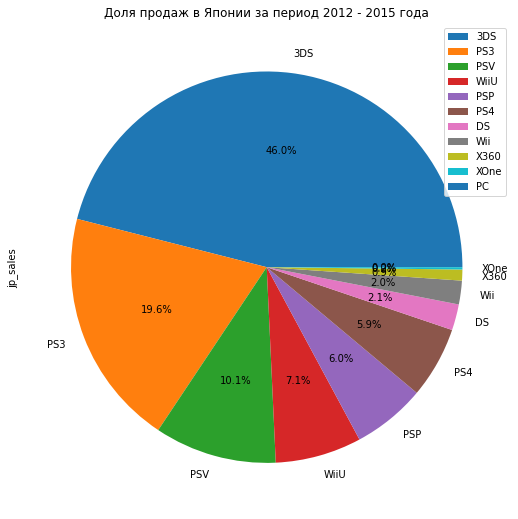

In [71]:
(actual_data
 .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False)
 .plot(kind = 'pie', y = 'jp_sales', figsize = (9, 9), autopct = '%1.1f%%')
);
plt.title('Доля продаж в Японии за период 2012 - 2015 года');

Проверим как изменилась ситуация в последние годы 2014 и 2015

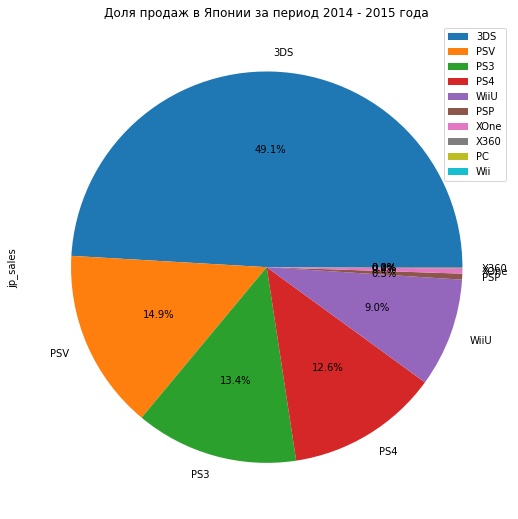

In [72]:
(actual_data
 .query('year_of_release >= 2014')
 .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False)
 .plot(kind = 'pie', y = 'jp_sales', figsize = (9, 9), autopct = '%1.1f%%')
);
plt.title('Доля продаж в Японии за период 2014 - 2015 года');

**ТОП-5 прибыльных платформ:**
- 3DS
- PSV
- PS3
- PS4
- WIIU

При рассмотрении 2х периодов 4 года 2012-2015 и 2 года 2014-2015 ситуация принципиально поменялась не сильно. 

Пользователи из Японии отдают наибольшее предпочтение приставкам Nintendo и реже, но тоже довольно часто PlayStation. Приставки Xbox практически не представлены на рынке. 

Также по распределению видно, что пользователи предпочитают портативные консоли, их доля продаж выше, чем у стационарных приставок.

In [73]:
(actual_data
 .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = ['median', 'count', 'mean', 'sum'])
 .sort_values(by = ('median', 'jp_sales'), ascending = False)
 .style.format("{:,.2f}")) 

,median,count,mean,sum
,jp_sales,jp_sales,jp_sales,jp_sales
genre,,,,
Role-Playing,0.06,316.00,0.19,58.83
Fighting,0.03,93.00,0.09,8.69
Adventure,0.02,246.00,0.03,7.06
Action,0.01,853.00,0.05,45.73
Misc,0.01,160.00,0.07,11.82
Platform,0.00,70.00,0.12,8.52
Puzzle,0.00,27.00,0.08,2.14
Racing,0.00,91.00,0.03,2.49


**ТОП-5 игровых жанров:**
- Role-Playing
- Fighting
- Adventure
- Action
- Misc	

Role-Playing наиболее популярный жанр среди пользователей в Японии. Это может быть связано с популярностью портативных консолей, может быть так удобнее.

### Влияние рейтинга ESRB на продажи в регионах

Проверим влияние рейтинга на продажи в регионе.

На графиках сравним медианные и суммарные продажи по каждому региону в зависимости от рейтинга.

Значение `unknown` были заполнены пропуски в столбце `rating`

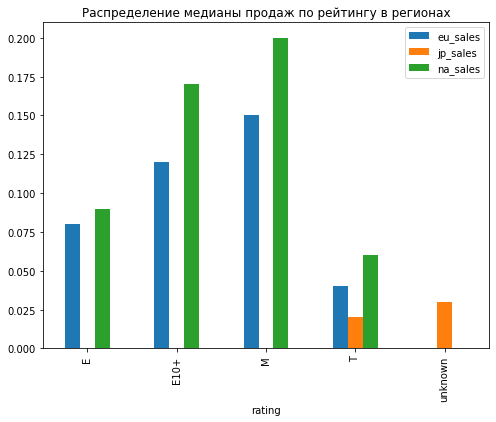

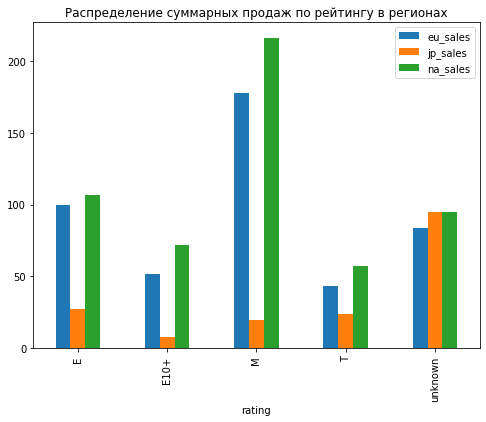

In [74]:
(actual_data
 .pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'median')
 .plot(kind = 'bar', figsize = (8, 6), title = 'Распределение медианы продаж по рейтингу в регионах'));

(actual_data
 .pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
 .plot(kind = 'bar', figsize = (8, 6), title = 'Распределение суммарных продаж по рейтингу в регионах'));

plt.show()

На графиках видно, что для Северной Америки и Европы распределения похожи - наибольшие продажи игр с рейтингом М (для взрослых), минимальные продажи игр с рейтингом Т (подростки от 13 лет). Медианные продажи игр с отсутвующим рейтингом, однако суммарные продажи достаточно высокие, это может значить, что большинство таких не представлены на этом рынке и продаж не имеют, но есть небольшая часть игр, которые хорошо продаются.

В Японии наибольшее количество продаж игр, у который отсутствуют данные о рейтинге, возможно, это большинство этих игр, выпущены для локального рынка.

P.S. у меня нет такой статисти но исходя из жизненых наблюдей мне кажется, что преобладают игры в категории для взрослых, потому что молодое поколение (особенно дети до 10 лет) больше играют и используют для развлечений смартфоны и планшеты, чем игровые консоли. Это одна из теорий

## Проверка гипотез

**Нулевая гипотеза:** Средний пользовательский рейтинг XOne равен среднему пользовательскому рейтингу PC.

**Альтернативная гипотеза:** Средний пользовательский рейтинг XOne не равен среднему пользовательскому рейтингу PC.

Для проперки гипотезы уберем из данных, стороки где были пропуски в столбце `user_score`, на этапе предобработки мы заменили пропуски значением 111

In [75]:
data_user_score = actual_data.query('user_score != 111')

In [76]:
alpha = 0.05

results = st.ttest_ind(
    data_user_score.query('platform == "XOne"')['user_score'],
    data_user_score.query('platform == "PC"')['user_score'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9441751855931831
Не получилось отвергнуть нулевую гипотезу


Значит можно считать, что средняя оценка пользователей XOne и PC примерно равны. 

P.S. мне показалось это странным, я стала проверять, может я как-то неправильно убрала пропуски, но теперь никак не могу найти что не так

In [77]:
data.query('user_score != 111').pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean')

,user_score
platform,
3DS,6.852047
DC,8.528571
DS,7.022656
GBA,7.669323
GC,7.615686
PC,7.065960
PS,7.858491
PS2,7.625328
PS3,6.720930


In [78]:
data.query('user_score != 111')['user_score'].unique()

array([8. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports равны

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports не равны

In [79]:
alpha = 0.05

results = st.ttest_ind(
    data_user_score.query('genre == "Action"')['user_score'],
    data_user_score.query('genre == "Sports"')['user_score'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.070626122768134e-18
Отвергаем нулевую гипотезу


Нулевая гипотеза были сформулированы так, чтобы использовалось равенство, альтернативная гипотеза была сформулирована исходя из нулевой гипотезы.

Выбран критерий - двухвыборочный критерий Стьюдента (независимые выборки) - проверка гипотезы о равенстве средних двух генеральных совокупностей (гугл мне помог).

## Вывод

Для анализа использовались данные с 1980 по 2016 год, доступные из открытых источников, о продажах игр, оценки пользователей и экспертов, жанры и платформы. За 2016 год данные неполные.

**Предобработка**

Обнаружено большое число пропусков в столбцах с оценками критиков и пользователей, и рейтинге, причиной пропусков может быть отсутсивие оценок. Заолнение пропусков исходя из других значений невозможно, принято решение аполнить заглушками.

Обнаружены пропуски в значениях года релиза, пропусков менее 2%, принято решение удалить. Пропуски могли возникнуть при сборе данных.

**Исследовательский анализ**

Актуальный период для анализа принят 2012 - 2015 года. Данные 2016 не используются так как они не полные.

Потенциально прибыльные платформы:
- PS4, XOne - новички рынка
- 3DS, WiiU - стабильные продажи

Потенциально популярные игровые жанры:
- Shooter
- Sports
- Role-Playing

Жанр Action - рекомендация обратить внимание только на самые популярные игры жанра (GTA5, FiFa Soccer 13), так как на них приходится большая часть продаж.

Влияние оценок критиков и пользователей:
- Наблюдается средняя положительная корреляция между оценками критиков и оценками пользователей. Чем выше оценка критиков, тем выше оценка пользователей.

- Наблюдается небольшая положительная корреляция между оценками критиков и суммарными продажами. Чем выше оценка, тем больше суммарные продажи.

- Коэффициент корреляции между оценками пользователей и суммарными продажами близок к нулю. Зависимость не прослеживается. 


**Портрет пользователя**

* **Северная Америка** - пользователь стационарных приставок предпочтительно PlayStation и Xbox, любимый жанр - Shooter в категории только для взрослых. 
* **Европа** - пользователь стационарных приставок предпочтительно PlayStation, любимый жанр - Shooter в категории только для взрослых.
* **Япония** - пользователь портативных консолей предпочтительно Nintendo, любимый жанр - Role-Playing.

**Проверка гипотез**

- Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтверждается данными;
- Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные подтверждается данными.

**Итог** 
1) Закономерности, определяющие успешность игры:
   - региональные особенности - популярность платформы и игрового жанра в конкретном регионе,
   - наличие высоких оценок критиков,
   - возрастной рейтинг.
2) Потенциально популярный продукт:
   - платформа PS4 (популярна во многих регионах, имеет хорошие продажи),
   - жанр Shooter (суммарно рынок Северной Америки и Европы больше и прибыльней),
   - рейтинг ESRB - М (только для взрослых).
   
   При этом также можно обратить внимание на жанры:
   - Role-Playing (популярен в Японии), 
   - Sports (хорошие суммарные продажи),
   - Отдельные самые продаваемые игры жанра Action (имеют высокое число продаж).

